<a href="https://colab.research.google.com/github/ashutoshsinha25/CaseStudy-Delhivery/blob/main/Delhivery-DataEngg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import ttest_ind , ttest_rel
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import levene



from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
table_style=  [{"selector": "", "props": [("border", "1px solid grey")]},
      {"selector": "tbody td", "props": [("border", "1px solid grey")]},
     {"selector": "th", "props": [("border", "1px solid grey")]}
    ]

#### Column Profiling:


- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
- FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
- Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and - minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

In [ ]:
import time
from tqdm import tqdm
def run_30_min_timer():
  start_time = time.time()
  duration = 30 * 60
  for _ in tqdm(range(duration), desc="Running for 30 minutes", unit="second"):
      time.sleep(1)
  print("Code execution completed after 30 minutes.")

In [ ]:
from dataclasses import dataclass

In [ ]:
class PrettyPrint:
  @staticmethod
  def printll():
    print('-' * 80)

  @staticmethod
  def printllWithFeat(section_text):
    separator_length = 80
    remaining_length = (separator_length - len(section_text) - 4) // 2
    print(f"{'-' * remaining_length} {section_text} {'-' * remaining_length}")

pp = PrettyPrint()

In [ ]:
df=pd.read_csv('delhivery_data-1.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,False,70,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Basic cleaning and exploration

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df[['source_name']].head()

,source_name
0,Anand_VUNagar_DC (Gujarat)
1,Anand_VUNagar_DC (Gujarat)
2,Anand_VUNagar_DC (Gujarat)
3,Anand_VUNagar_DC (Gujarat)
4,Anand_VUNagar_DC (Gujarat)


In [ ]:
df[['destination_name']].head()

,destination_name
0,Khambhat_MotvdDPP_D (Gujarat)
1,Khambhat_MotvdDPP_D (Gujarat)
2,Khambhat_MotvdDPP_D (Gujarat)
3,Khambhat_MotvdDPP_D (Gujarat)
4,Khambhat_MotvdDPP_D (Gujarat)


In [ ]:
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111


In [ ]:
# drooping unknown fields
drop_cols = ['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df.drop(drop_cols,axis=1,inplace=True)

#### Converting cols to datetime

In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
cat_cols = [x for x in df.columns.to_list() if df[x].dtype == 'O']
cat_cols

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name']

In [ ]:
num_cols = [x for x in df.columns.to_list() if df[x].dtype != 'O']
num_cols

['trip_creation_time',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

#### Exploring structure & characteristics of the features

In [ ]:
# display(df['data'].value_counts().reset_index().style.set_table_styles(table_styles=table_style))
for ele in cat_cols :
    val = df[ele].value_counts()
    if len(val.to_list()) < 20 :
      pp.printllWithFeat(ele)
      display(val.to_frame().style.set_table_styles(table_styles=table_style))
    else:
      pp.printllWithFeat(ele)
      display(val[:10].to_frame().style.set_table_styles(table_styles=table_style))
    pp.printll()

------------------------------------ data ------------------------------------


,count
data,
training,104858
test,40009


--------------------------------------------------------------------------------
---------------------------- route_schedule_uuid ----------------------------


,count
route_schedule_uuid,
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9,1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10,1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366,1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2,1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d,1280
thanos::sroute:96a80600-40e1-436b-9161-fa68f9e4b0d6,1211
thanos::sroute:bcce7b68-e962-4a29-af24-167e3e926d04,1162
thanos::sroute:69409580-4bf0-4bbf-96fe-9e7bc6582a27,1158
thanos::sroute:7af51efd-ae4d-49bc-9b68-345abe68ace5,1085


--------------------------------------------------------------------------------
--------------------------------- route_type ---------------------------------


,count
route_type,
FTL,99660
Carting,45207


--------------------------------------------------------------------------------
--------------------------------- trip_uuid ---------------------------------


,count
trip_uuid,
trip-153811219535896559,101
trip-153846035308581166,101
trip-153802363942560700,101
trip-153759210483476123,101
trip-153819749763881430,101
trip-153854305492910872,101
trip-153715938946690081,101
trip-153784927255069118,101
trip-153793758186488532,101


--------------------------------------------------------------------------------
------------------------------- source_center -------------------------------


,count
source_center,
IND000000ACB,23347
IND562132AAA,9975
IND421302AAG,9088
IND411033AAA,4061
IND501359AAE,3340
IND712311AAA,2612
IND160002AAC,2450
IND395023AAA,2189
IND110037AAM,2013


--------------------------------------------------------------------------------
-------------------------------- source_name --------------------------------


,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),23347
Bangalore_Nelmngla_H (Karnataka),9975
Bhiwandi_Mankoli_HB (Maharashtra),9088
Pune_Tathawde_H (Maharashtra),4061
Hyderabad_Shamshbd_H (Telangana),3340
Kolkata_Dankuni_HB (West Bengal),2612
Chandigarh_Mehmdpur_H (Punjab),2450
Surat_HUB (Gujarat),2189
Delhi_Airport_H (Delhi),2013


--------------------------------------------------------------------------------
----------------------------- destination_center -----------------------------


,count
destination_center,
IND000000ACB,15192
IND562132AAA,11019
IND421302AAG,5492
IND501359AAE,5142
IND712311AAA,4892
IND110037AAM,3769
IND411033AAA,3695
IND160002AAC,2874
IND131028AAB,2796


--------------------------------------------------------------------------------
------------------------------ destination_name ------------------------------


,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),15192
Bangalore_Nelmngla_H (Karnataka),11019
Bhiwandi_Mankoli_HB (Maharashtra),5492
Hyderabad_Shamshbd_H (Telangana),5142
Kolkata_Dankuni_HB (West Bengal),4892
Delhi_Airport_H (Delhi),3769
Pune_Tathawde_H (Maharashtra),3695
Chandigarh_Mehmdpur_H (Punjab),2874
Sonipat_Kundli_H (Haryana),2796


--------------------------------------------------------------------------------


In [ ]:
# categorical cols

df[cat_cols].describe(include='O').style.set_table_styles(table_styles=table_style)

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144574,144867,144606
unique,2,1504,2,14817,1508,1498,1481,1468
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


In [ ]:
# numerical cols

df[num_cols].describe().style.set_table_styles(table_styles=table_style)

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.829020
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,nan,nan,nan,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.860660


In [ ]:
# range of the dataset
df['trip_creation_time'].min() , df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

`Initial Observations`

- Out of 24 features, 4 are datetime, 11 are numerical, 8 are categorical, and 1 is boolean.
- 72% data is of training and 28% are testing type [ based `data` col ]
- the dataset is over a duration of around a month, starting `2018-09-12` to `2018-10-08`
- Most common source and destination name is Gurgaon_Bilaspur_HB (Haryana) [ based on `source_name` and `destination_name`]

#### Handling missing values

In [ ]:
(df.isna().sum() / len(df))* 100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64

In [ ]:
# set(df[df['source_name'].isna()]['source_center'])&set(df[df['destination_name'].isna()]['destination_center'])
missing_src_name = df.loc[df['source_name'].isna() , 'source_center'].unique()
missing_src_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
missing_dst_name = df.loc[df['destination_name'].isna() , 'destination_center'].unique()
missing_dst_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
# df[df['source_name'].str.contains('Bangalore')]  # .apply(lambda x : x.str.contains('Bangalore'))

In [ ]:
# IDs for which the source name is missing, are all those IDs for destination also missing ?
np.all(df.loc[df['source_name'].isna() ,  'source_center'].isin(missing_dst_name))

False

In [ ]:
# since missing values in both featues are relatively low, lets drop those rows.
df.dropna(subset= ['source_name' , 'destination_name'],axis=0, inplace=True)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [ ]:
df.shape

# we can see there is a drop of 397 rows from the dataset

(144316, 19)

### Understand the features


In [ ]:
# lets look at one of the trip to see how its data is recorded
np.random.seed(14123123)
df.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
118892,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,419.273596,798.0,401.0,530.3934,32.0,19.0,27.472


In [ ]:
np.random.seed(14123123)
val = df.sample()['trip_uuid'].to_list()[0]
temp = df[df['trip_uuid'] == val]
temp.shape

(28, 19)

In [ ]:
temp.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
118874,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,28.105094,56.0,23.0,35.1320,56.0,23.0,35.1320
118875,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,44.052790,92.0,38.0,54.4659,35.0,14.0,19.3339
118876,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,66.074991,126.0,63.0,89.1479,33.0,25.0,34.6820
118877,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,88.857358,159.0,130.0,139.1907,33.0,73.0,58.5497
118878,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,111.572665,191.0,147.0,173.6802,32.0,80.0,78.1302
118879,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,132.560637,221.0,161.0,197.1530,29.0,15.0,21.5343
118880,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,154.788798,250.0,178.0,221.4157,28.0,17.0,24.2627
118881,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,176.568906,307.0,194.0,243.8518,57.0,15.0,22.4361
118882,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,198.389867,349.0,212.0,269.1169,41.0,17.0,25.2651
118883,training,2018-09-12 12:37:38.769394,thanos::sroute:f736bbd2-bccd-4649-a101-94b6a89...,FTL,trip-153675585876910425,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-12 12:37:38.769394,2018-09-13 13:27:44.097501,1490.0,220.581022,399.0,229.0,293.1747,49.0,16.0,24.0578


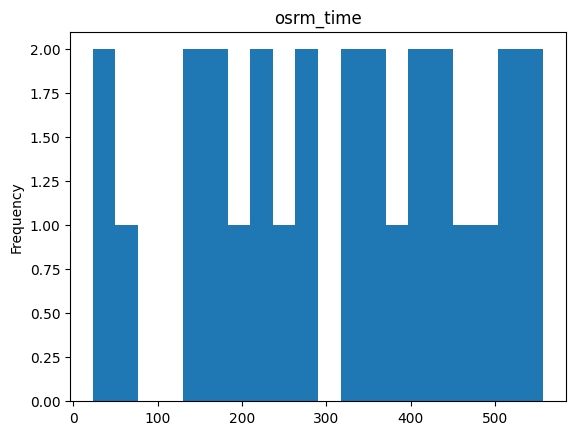

In [ ]:
temp['osrm_time'].plot(kind='hist', bins=20, title='osrm_time')
plt.show()

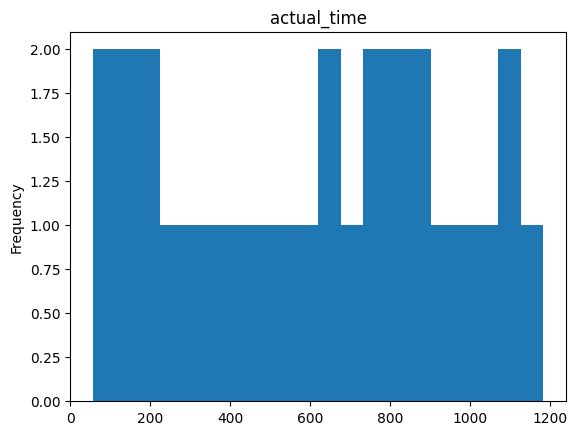

In [ ]:
temp['actual_time'].plot(kind='hist', bins=20, title='actual_time')
plt.show()

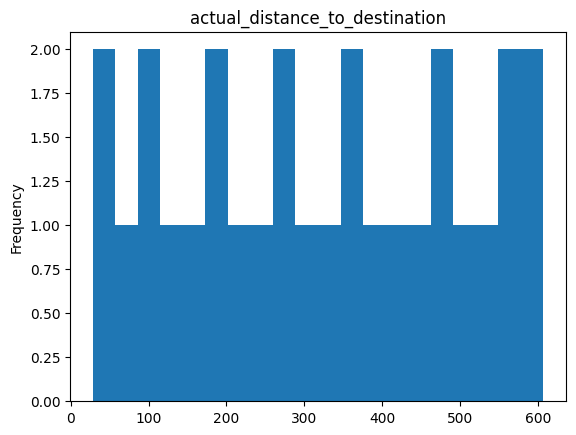

In [ ]:
temp['actual_distance_to_destination'].plot(kind='hist', bins=20, title='actual_distance_to_destination')
plt.show()

- looking at a particular trip_uuid; we can say that trips are segmented between different drop locations. Trips are taking place between warehouses from source and destination location. `od_start_time` and `od_end_time` times are help us understand when a particular trip was started or ended
`start_scan_to_end_scan` tells us the time of trips.
`trip_cutoff` tell us when the warehouse is changed between source and destination
`actual_time` tells us the time for entire delivery from source to destination (cumulative)


#### Merging rows  

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
# Grouping by segment
combo_cols = ['trip_uuid', 'source_center', 'destination_center']
df['segment_key'] = df['trip_uuid'].astype(str) + '-' + df['source_center'].astype(str) + '-' + df['destination_center'].astype(str)

# agg
dff = df.groupby('segment_key').agg({'data' : 'first',
                                  'trip_creation_time' :'first',
                                 'route_schedule_uuid': 'first',
                                 'route_type': 'first',
                                 'source_name' : 'first' ,
                                 'destination_name': 'last',
                                 'od_start_time': 'first',
                                 'od_end_time': 'first',
                                 'start_scan_to_end_scan': 'first',
                                 'actual_distance_to_destination': 'last',
                                 'actual_time': 'last',
                                 'osrm_time': 'last',
                                 'osrm_distance': 'last',
                                 'segment_actual_time': 'sum',
                                 'segment_osrm_time':'sum',
                                 'segment_osrm_distance': 'sum'})

dff.rename({'segment_actual_time' : 'segment_actual_time_sum',
            'segment_osrm_time': 'segment_osrm_time_sum' ,
            'segment_osrm_distance' : 'segment_osrm_distance_sum'},inplace=True)

dff = dff.sort_values(by=['segment_key', 'od_end_time'])

In [ ]:
dff.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
segment_key,,,,,,,,,,,,,,,,
trip-153671041653548748-IND209304AAA-IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
trip-153671041653548748-IND462022AAA-IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
trip-153671042288605164-IND561203AAB-IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
trip-153671042288605164-IND572101AAA-IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
trip-153671043369099517-IND000000ACB-IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


In [ ]:
dff.shape

(26222, 16)

In [ ]:
val=dff['od_end_time'][0] - dff['od_start_time'][0]
# val.total_seconds().
val

Timedelta('0 days 21:00:36.265275')

#### Feature Engineering:


In [ ]:
# time take between od_start_time and od_end_time
dff['od_time_diff_hour'] = dff['od_end_time'] - dff['od_start_time']
dff['od_time_diff_hour'] = dff['od_time_diff_hour'].apply(lambda x : round(x.total_seconds()/3600,2))
dff.drop(['od_end_time' ,'od_start_time' ],axis = 1, inplace=True)
dff.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour
segment_key,,,,,,,,,,,,,,,
trip-153671041653548748-IND209304AAA-IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,21.01
trip-153671041653548748-IND462022AAA-IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,16.66
trip-153671042288605164-IND561203AAB-IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,0.98
trip-153671042288605164-IND572101AAA-IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,2.05
trip-153671043369099517-IND000000ACB-IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,13.91


In [ ]:
x = dff['destination_name'][5]
l = x.split()[0].split('_', 1)
l

['Gurgaon', 'Bilaspur_HB']

In [ ]:
dff[dff['destination_name'].str.upper().str.contains("MAA")].head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour
segment_key,,,,,,,,,,,,,,,
trip-153671464491487828-IND600044AAE-IND600056AAB,training,2018-09-12 01:10:44.915124,thanos::sroute:0ad372b1-418a-4685-873a-bc356d1...,Carting,Chennai_Chrompet_L (Tamil Nadu),MAA_Poonamallee_HB (Tamil Nadu),260.0,24.901135,71.0,35.0,36.1215,71.0,50.0,49.2386,4.33
trip-153672000309775410-IND562132AAA-IND600056AAB,training,2018-09-12 02:40:03.098133,thanos::sroute:2994b7ae-bb9c-4d7c-a30f-7882553...,FTL,Bangalore_Nelmngla_H (Karnataka),MAA_Poonamallee_HB (Tamil Nadu),641.0,267.330565,484.0,242.0,320.1209,480.0,312.0,354.5661,10.69
trip-153672354281727425-IND632006AAA-IND600056AAB,training,2018-09-12 03:39:02.817499,thanos::sroute:be3ff999-4748-4191-a0a3-6079115...,FTL,Vellore_GndhiNgr_IP (Tamil Nadu),MAA_Poonamallee_HB (Tamil Nadu),190.0,84.893400,147.0,83.0,106.2256,146.0,82.0,106.2256,3.18
trip-153673698511871750-IND605601AAA-IND600056AAB,training,2018-09-12 07:23:05.118967,thanos::sroute:88aae86c-1ca6-4464-8da3-82a8d06...,FTL,Villupuram_Thirumtr_IP (Tamil Nadu),MAA_Poonamallee_HB (Tamil Nadu),233.0,132.485438,191.0,124.0,151.2366,189.0,121.0,151.2366,3.89
trip-153674092354156767-IND632006AAA-IND600056AAB,training,2018-09-12 08:28:43.541798,thanos::sroute:74b9b462-bcb2-4977-a97b-8a2203d...,FTL,Vellore_GndhiNgr_IP (Tamil Nadu),MAA_Poonamallee_HB (Tamil Nadu),309.0,84.942592,159.0,82.0,105.7899,157.0,108.0,144.4251,5.16


In [ ]:
count = 0
unique_dest = set()
for i, val in dff.iterrows():
  check_string = val['destination_name']
  s = check_string.split('_' , 1)[0]
  if len(s) == 3:
    count +=1
    unique_dest.add(s)
print(f"these many records were ound with CODE instead of CITY as first param : {count}")

these many records were ound with CODE instead of CITY as first param : 974


In [ ]:
unique_dest

{'AMD',
 'Amd',
 'BLR',
 'CCU',
 'Cjb',
 'Del',
 'FBD',
 'GGN',
 'GZB',
 'Goa',
 'Hyd',
 'MAA',
 'Mau',
 'NOI',
 'Pen',
 'Una',
 'Wai'}

In [ ]:
count = 0
unique_source = set()
for i, val in dff.iterrows():
  check_string = val['source_name']
  s = check_string.split('_' , 1)[0]
  if len(s) == 3:
    count +=1
    unique_source.add(s)
print(f"these many records were ound with CODE instead of CITY as first param : {count}")

these many records were ound with CODE instead of CITY as first param : 1019


In [ ]:
unique_source

{'AMD',
 'Amb',
 'Amd',
 'BLR',
 'BOM',
 'Blr',
 'CCU',
 'Cjb',
 'Del',
 'FBD',
 'GGN',
 'GZB',
 'Goa',
 'Hyd',
 'MAA',
 'Mau',
 'NOI',
 'Pen',
 'Una',
 'Wai'}

In [ ]:
for i, val in dff.iterrows():
  check_string = val['source_name']
  s = check_string.split('(')
  s = s[1].replace(')', "")
  print(s)
  break

Uttar Pradesh


In [ ]:
count = 0
unique_city = set()
unique_full = []
for i, val in dff.iterrows():
  check_string = val['source_name']
  s = check_string.split()[0].split('_',1)
  if len(s) == 1:
    count +=1
    unique_city.add(s[0])
  unique_full.append(s)
print(f"these many records were ound with only CITY as first param : {count}")

these many records were ound with only CITY as first param : 834


In [ ]:
unique_full[:10]

[['Kanpur', 'Central_H_6'],
 ['Bhopal', 'Trnsport_H'],
 ['Doddablpur', 'ChikaDPP_D'],
 ['Tumkur', 'Veersagr_I'],
 ['Gurgaon', 'Bilaspur_HB'],
 ['Bangalore', 'Nelmngla_H'],
 ['Mumbai'],
 ['Bellary', 'Dc'],
 ['Sandur', 'WrdN1DPP_D'],
 ['Hospet']]

In [ ]:
unique_city

{'Airport',
 'Ambala',
 'Bareilly',
 'Bhiwadi',
 'Bhopal',
 'Bidar',
 'Central',
 'Chandigarh',
 'Darbhanga',
 'Dehradun',
 'Erode',
 'Faridabad',
 'Ganga',
 'HBR',
 'Haridwar',
 'Hathras',
 'Hospet',
 'Jabalpur',
 'Jaipur',
 'Janakpuri',
 'Karnal',
 'Karur',
 'Meerut',
 'Mumbai',
 'PNQ',
 'Palwal',
 'Panaji',
 'Panipat',
 'Patiala',
 'Pilani',
 'Pune',
 'Rohtak',
 'Salem',
 'Shillong',
 'Tiruchi',
 'Udupi',
 'Vadodara',
 'Vijayawada',
 'Vizag'}

In [ ]:
s= 'Tiruchi (Kolkata)'
val = s.split("_")
len(val)

1

In [ ]:
# destination names : city-place-code(state)
x = dff['destination_name'][5]
# x.split('_')[0], x.split('_')[1], x.split('_')[2][0], x.split(' ')[-1]


# def extract_info(s):
#     pattern = r'(?P<city>[^_]+)?(?:_(?P<place>[^_]+))?(?:_(?P<code>[^_]+))?\s*\((?P<state>[^)]+)\)?$'
#     # pattern = r'(?P<city>[^_]+)_(?P<place>[^_]+)?(?:_(?P<code>[^_]+))?\s*\((?P<state>[^)]+)\)?$'
#     m = re.match(pattern, s)
#     if m:
#       city = m.group('city') if m.group('city') else 'data not found'
#       place = m.group('place') if m.group('place') else 'data not found'
#       code = m.group('code') if m.group('code') else 'data not found'
#       state = m.group('state') if m.group('state') else 'data not found'
#     else:
#       city, place, code, state = 'data not found', 'data not found', 'data not found', 'data not found'
#     return city, place, code, state


class ExtractInfo:
  @staticmethod
  def string_city(s=None):
    val = s.split()[0].split('_')
    if 'CCU' in val[0].upper():
        return 'Kolkata'
    elif 'MAA' in val[0].upper():
        return 'Chennai'
    elif ('HBR' in val[0].upper()) or ('BLR' in val[0].upper()):
        return 'Bengaluru'
    elif 'FBD' in val[0].upper():
        return 'Faridabad'
    elif 'BOM' in val[0].upper():
        return 'Mumbai'
    elif 'DEL' in val[0].upper():
        return 'Delhi'
    elif 'OK' in val[0].upper():
        return 'Delhi'
    elif 'GZB' in val[0].upper():
        return 'Ghaziabad'
    elif 'GGN' in val[0].upper():
        return 'Gurgaon'
    elif 'AMD' in val[0].upper():
        return 'Ahmedabad'
    elif 'CJB' in val[0].upper():
        return 'Coimbatore'
    elif 'HYD' in val[0].upper():
        return 'Hyderabad'
    else:
      return val[0]
  @staticmethod
  def string_place(s):
    if 'HBR' in s:
        return 'HBR Layout PC'
    elif 'PNQ' in s:
      return 'Pune'
    else:
       l = s.split()[0].split('_', 1)
       if len(l) == 1:
          return 'No Place Record'
       else:
          return l[1]
  @staticmethod
  def string_code(s):
    val = ExtractInfo.string_place(s)
    val = val.split("_",1)
    if len(val) == 1:
       return 'No Code Record'
    else:
       return val[1]
  @staticmethod
  def string_state(s):
    val = s.split('(')
    val = val[1].replace(')', "")
    return val

temp = dff.copy().head()
ee = ExtractInfo()

In [ ]:
temp['destination_name'].apply(lambda x : x.split()[0].split("_"))

segment_key
trip-153671041653548748-IND209304AAA-IND000000ACB      [Gurgaon, Bilaspur, HB]
trip-153671041653548748-IND462022AAA-IND209304AAA      [Kanpur, Central, H, 6]
trip-153671042288605164-IND561203AAB-IND562101AAA    [Chikblapur, ShntiSgr, D]
trip-153671042288605164-IND572101AAA-IND561203AAB    [Doddablpur, ChikaDPP, D]
trip-153671043369099517-IND000000ACB-IND160002AAC    [Chandigarh, Mehmdpur, H]
Name: destination_name, dtype: object

In [ ]:
temp['destination_name'].apply(lambda x : x.split()[0].split("_" , 1))

segment_key
trip-153671041653548748-IND209304AAA-IND000000ACB      [Gurgaon, Bilaspur_HB]
trip-153671041653548748-IND462022AAA-IND209304AAA       [Kanpur, Central_H_6]
trip-153671042288605164-IND561203AAB-IND562101AAA    [Chikblapur, ShntiSgr_D]
trip-153671042288605164-IND572101AAA-IND561203AAB    [Doddablpur, ChikaDPP_D]
trip-153671043369099517-IND000000ACB-IND160002AAC    [Chandigarh, Mehmdpur_H]
Name: destination_name, dtype: object

In [ ]:
temp['destination_name'].apply(ee.string_state)

segment_key
trip-153671041653548748-IND209304AAA-IND000000ACB          Haryana
trip-153671041653548748-IND462022AAA-IND209304AAA    Uttar Pradesh
trip-153671042288605164-IND561203AAB-IND562101AAA        Karnataka
trip-153671042288605164-IND572101AAA-IND561203AAB        Karnataka
trip-153671043369099517-IND000000ACB-IND160002AAC           Punjab
Name: destination_name, dtype: object

In [ ]:
temp['destination_name'].apply(ee.string_place)

segment_key
trip-153671041653548748-IND209304AAA-IND000000ACB    Bilaspur_HB
trip-153671041653548748-IND462022AAA-IND209304AAA    Central_H_6
trip-153671042288605164-IND561203AAB-IND562101AAA     ShntiSgr_D
trip-153671042288605164-IND572101AAA-IND561203AAB     ChikaDPP_D
trip-153671043369099517-IND000000ACB-IND160002AAC     Mehmdpur_H
Name: destination_name, dtype: object

In [ ]:
temp['destination_name'].apply(ee.string_code)

segment_key
trip-153671041653548748-IND209304AAA-IND000000ACB     HB
trip-153671041653548748-IND462022AAA-IND209304AAA    H_6
trip-153671042288605164-IND561203AAB-IND562101AAA      D
trip-153671042288605164-IND572101AAA-IND561203AAB      D
trip-153671043369099517-IND000000ACB-IND160002AAC      H
Name: destination_name, dtype: object

In [ ]:
temp['destination_name'].apply(ee.string_city)

segment_key
trip-153671041653548748-IND209304AAA-IND000000ACB       Gurgaon
trip-153671041653548748-IND462022AAA-IND209304AAA        Kanpur
trip-153671042288605164-IND561203AAB-IND562101AAA    Chikblapur
trip-153671042288605164-IND572101AAA-IND561203AAB    Doddablpur
trip-153671043369099517-IND000000ACB-IND160002AAC    Chandigarh
Name: destination_name, dtype: object

In [ ]:
# for ele in temp['destination_name'].values:
#   print(ele)
#   city, place, code, state = extract_info(ele)
#   print(f"City: {city}, Place: {place}, Code: {code}, State: {state}")
#   pp.printll()

In [ ]:
# dff['source_city'] = dff['source_name'].apply(run_extract_info, args=(['1']))
# dff['source_place'] = dff['source_name'].apply(run_extract_info, args=(['2']))
# dff['source_code'] = dff['source_name'].apply(run_extract_info, args=(['3']))
# dff['source_state'] = dff['source_name'].apply(run_extract_info, args=(['4']))



# dff['destination_city'] = dff['destination_name'].apply(run_extract_info, args=(['1']))
# dff['destination_place'] = dff['destination_name'].apply(run_extract_info, args=(['2']))
# dff['destination_code'] = dff['destination_name'].apply(run_extract_info, args=(['3']))
# dff['destination_state'] = dff['destination_name'].apply(run_extract_info, args=(['4']))

In [ ]:
dff['source_city'] = dff['source_name'].apply(ee.string_city)
dff['source_place'] = dff['source_name'].apply(ee.string_place)
dff['source_code'] = dff['source_name'].apply(ee.string_code)
dff['source_state'] = dff['source_name'].apply(ee.string_state)



dff['destination_city'] = dff['destination_name'].apply(ee.string_city)
dff['destination_place'] = dff['destination_name'].apply(ee.string_place)
dff['destination_code'] = dff['destination_name'].apply(ee.string_code)
dff['destination_state'] = dff['destination_name'].apply(ee.string_state)

In [ ]:
dff['source_city'].nunique(), dff['source_place'].nunique(), dff['source_code'].nunique(), dff['source_state'].nunique()

(1211, 1207, 49, 31)

In [ ]:
dff['destination_city'].nunique(), dff['destination_place'].nunique(), dff['destination_code'].nunique(), dff['destination_state'].nunique()

(1209, 1179, 49, 32)

In [ ]:
dff['destination_state'].unique()

array(['Haryana', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Andhra Pradesh', 'Telangana',
       'Rajasthan', 'Madhya Pradesh', 'Assam', 'West Bengal',
       'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa', 'Uttarakhand',
       'Bihar', 'Jharkhand', 'Pondicherry', 'Goa', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Meghalaya', 'Nagaland', 'Tripura',
       'Daman & Diu'], dtype=object)

In [ ]:
dff['destination_code'].unique()

array(['HB', 'H_6', 'D', 'H', 'IP', 'No Code Record', 'Dc', 'DC', 'I_4',
       'D_3', 'I', 'DPP_3', 'I_7', 'I_2', 'D_1', 'DPP_2', 'DPC', 'H_1',
       'DPP_1', 'L', 'Nagar_DPC', 'I_1', 'D_2', 'PC', 'Pc', 'H_2', 'D_12',
       'D_9', 'D_10', 'RPC', 'P', 'GW', 'Gateway', 'I_3', 'R_8', 'I_21',
       'INT', 'M', 'DPP_4', 'D_7', 'D_5', 'C', 'L_23', 'Layout_PC',
       'I_20', 'D_8', 'L_8', 'H_4', 'CP'], dtype=object)

In [ ]:
dff[dff['destination_code'].str.contains('Layout_PC')].head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
segment_key,,,,,,,,,,,,,,,,,,,,,,,
trip-153717117397447554-IND562132AAA-IND000000ACS,training,2018-09-17 07:59:33.974840,thanos::sroute:80519551-f91c-4987-96c8-4e9e3fd...,Carting,Bangalore_Nelmngla_H (Karnataka),BLR_HSR_Layout_PC (Karnataka),142.0,24.981886,79.0,30.0,31.6559,78.0,66.0,71.3620,2.38,Bangalore,Nelmngla_H,H,Karnataka,Bengaluru,HSR_Layout_PC,Layout_PC,Karnataka
trip-153732671571115661-IND560300AAA-IND000000ACS,training,2018-09-19 03:11:55.711491,thanos::sroute:42cd2ce7-95e5-44cb-8e57-71d5b50...,Carting,Bengaluru_KGAirprt_HB (Karnataka),BLR_HSR_Layout_PC (Karnataka),179.0,28.866236,107.0,44.0,41.2743,106.0,52.0,45.9647,2.99,Bengaluru,KGAirprt_HB,HB,Karnataka,Bengaluru,HSR_Layout_PC,Layout_PC,Karnataka
trip-153738974248048009-IND562132AAA-IND000000ACS,training,2018-09-19 20:42:22.480767,thanos::sroute:f044f0e9-a12f-49f8-b57e-4df4eeb...,Carting,Bangalore_Nelmngla_H (Karnataka),BLR_HSR_Layout_PC (Karnataka),150.0,25.338669,58.0,32.0,32.9223,57.0,38.0,38.3175,2.51,Bangalore,Nelmngla_H,H,Karnataka,Bengaluru,HSR_Layout_PC,Layout_PC,Karnataka
trip-153747650850848290-IND562132AAA-IND000000ACS,training,2018-09-20 20:48:28.508729,thanos::sroute:f044f0e9-a12f-49f8-b57e-4df4eeb...,Carting,Bangalore_Nelmngla_H (Karnataka),BLR_HSR_Layout_PC (Karnataka),137.0,21.381948,46.0,27.0,24.8952,44.0,26.0,24.8951,2.29,Bangalore,Nelmngla_H,H,Karnataka,Bengaluru,HSR_Layout_PC,Layout_PC,Karnataka
trip-153756193491156556-IND562132AAA-IND000000ACS,training,2018-09-21 20:32:14.911829,thanos::sroute:f044f0e9-a12f-49f8-b57e-4df4eeb...,Carting,Bangalore_Nelmngla_H (Karnataka),BLR_HSR_Layout_PC (Karnataka),138.0,25.506926,46.0,31.0,32.6798,46.0,30.0,32.6798,2.31,Bangalore,Nelmngla_H,H,Karnataka,Bengaluru,HSR_Layout_PC,Layout_PC,Karnataka


In [ ]:
dff[dff['destination_code'].str.contains('Nagar_DPC')].head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
segment_key,,,,,,,,,,,,,,,,,,,,,,,
trip-153671804931054468-IND110037AAM-IND201007AAA,training,2018-09-12 02:07:29.310888,thanos::sroute:db49a46f-efea-4969-8563-783682c...,Carting,Delhi_Airport_H (Delhi),GZB_Mohan_Nagar_DPC (Uttar Pradesh),240.0,23.384816,90.0,34.0,30.0082,90.0,41.0,36.0753,4.01,Delhi,Airport_H,H,Delhi,Ghaziabad,Mohan_Nagar_DPC,Nagar_DPC,Uttar Pradesh
trip-153672070284937432-IND000000ACB-IND201007AAA,training,2018-09-12 02:51:42.849771,thanos::sroute:ee8fee16-7b8e-448c-888e-a26b584...,Carting,Gurgaon_Bilaspur_HB (Haryana),GZB_Mohan_Nagar_DPC (Uttar Pradesh),274.0,60.121851,210.0,77.0,71.9171,207.0,99.0,94.8757,4.57,Gurgaon,Bilaspur_HB,HB,Haryana,Ghaziabad,Mohan_Nagar_DPC,Nagar_DPC,Uttar Pradesh
trip-153676433513011320-IND000000ACB-IND201007AAA,training,2018-09-12 14:58:55.130359,thanos::sroute:2b9fb5fb-b698-41c8-9619-d81c4c5...,Carting,Gurgaon_Bilaspur_HB (Haryana),GZB_Mohan_Nagar_DPC (Uttar Pradesh),262.0,60.058780,121.0,78.0,73.4550,119.0,96.0,86.2199,4.38,Gurgaon,Bilaspur_HB,HB,Haryana,Ghaziabad,Mohan_Nagar_DPC,Nagar_DPC,Uttar Pradesh
trip-153676931495465546-IND201007AAB-IND201007AAA,training,2018-09-12 16:21:54.955028,thanos::sroute:f97af306-e271-4534-9952-cb44afb...,Carting,Ghaziabad_MohanNgr_C (Uttar Pradesh),GZB_Mohan_Nagar_DPC (Uttar Pradesh),74.0,9.873184,18.0,14.0,11.3634,18.0,14.0,11.3634,1.24,Ghaziabad,MohanNgr_C,C,Uttar Pradesh,Ghaziabad,Mohan_Nagar_DPC,Nagar_DPC,Uttar Pradesh
trip-153677428952011396-IND110044AAB-IND201007AAA,training,2018-09-12 17:44:49.520376,thanos::sroute:9eeffc8a-a10a-45fe-a3bc-5c313eb...,Carting,Del_Okhla_PC (Delhi),GZB_Mohan_Nagar_DPC (Uttar Pradesh),152.0,13.357458,58.0,23.0,19.7873,57.0,23.0,20.3799,2.54,Delhi,Okhla_PC,PC,Delhi,Ghaziabad,Mohan_Nagar_DPC,Nagar_DPC,Uttar Pradesh


In [ ]:
# trip creation time

dff['trip_creation_day'] = dff['trip_creation_time'].dt.day.astype('int')
dff['trip_creation_month'] = dff['trip_creation_time'].dt.month.astype('int')
dff['trip_creation_year'] = dff['trip_creation_time'].dt.year.astype('int')
dff['trip_creation_date'] = dff['trip_creation_time'].dt.date
dff['trip_creation_week'] = dff['trip_creation_time'].dt.isocalendar().week.astype('int')
dff['trip_creation_hour'] = dff['trip_creation_time'].dt.hour.astype('int')

In [ ]:
dff['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
dff.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_date,trip_creation_week,trip_creation_hour
segment_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748-IND209304AAA-IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,21.01,Kanpur,Central_H_6,H_6,Uttar Pradesh,Gurgaon,Bilaspur_HB,HB,Haryana,12,9,2018,2018-09-12,37,0
trip-153671041653548748-IND462022AAA-IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,16.66,Bhopal,Trnsport_H,H,Madhya Pradesh,Kanpur,Central_H_6,H_6,Uttar Pradesh,12,9,2018,2018-09-12,37,0
trip-153671042288605164-IND561203AAB-IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,0.98,Doddablpur,ChikaDPP_D,D,Karnataka,Chikblapur,ShntiSgr_D,D,Karnataka,12,9,2018,2018-09-12,37,0
trip-153671042288605164-IND572101AAA-IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,2.05,Tumkur,Veersagr_I,I,Karnataka,Doddablpur,ChikaDPP_D,D,Karnataka,12,9,2018,2018-09-12,37,0
trip-153671043369099517-IND000000ACB-IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,13.91,Gurgaon,Bilaspur_HB,HB,Haryana,Chandigarh,Mehmdpur_H,H,Punjab,12,9,2018,2018-09-12,37,0


In [ ]:
# lets check our statistics again after feature creation

dff.describe(include='O')

,data,route_schedule_uuid,route_type,source_name,destination_name,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_date
count,26222,26222,26222,26222,26222,26222,26222,26222,26222,26222,26222,26222,26222,26222
unique,2,1497,2,1496,1466,1211,1207,49,31,1209,1179,49,32,22
top,training,thanos::sroute:f8c83fd0-6554-44f3-9408-32465bd...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),Bengaluru,Bilaspur_HB,D,Maharashtra,Bengaluru,Bilaspur_HB,D,Karnataka,2018-09-18
freq,18893,111,13798,1052,928,1255,1052,9139,3565,1391,928,9156,3497,1373


In [ ]:
dff.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,26222,2018-09-22 13:58:56.740969728,2018-09-12 00:00:16.535741,2018-09-17 03:57:50.900417024,2018-09-22 03:33:30.255023104,2018-09-27 19:55:17.273207040,2018-10-03 23:59:42.701692,NaN
start_scan_to_end_scan,26222.0,298.55339,20.0,90.0,152.0,307.0,7898.0,441.116816
actual_distance_to_destination,26222.0,92.533054,9.001351,21.654149,35.044329,65.557393,1927.447705,209.952355
actual_time,26222.0,200.926588,9.0,51.0,84.0,167.0,4532.0,385.730908
osrm_time,26222.0,90.785333,6.0,25.0,39.0,72.0,1686.0,185.554359
osrm_distance,26222.0,114.975332,9.0729,27.71915,43.54355,85.44395,2326.1991,254.426468
segment_actual_time,26222.0,199.095645,9.0,50.0,83.0,166.0,4504.0,382.150687
segment_osrm_time,26222.0,101.793341,6.0,25.0,42.0,79.0,1938.0,216.202739
segment_osrm_distance,26222.0,125.58713,9.0729,28.4291,45.79765,91.023575,2640.9247,286.670106
od_time_diff_hour,26222.0,4.984195,0.35,1.52,2.54,5.12,131.64,7.351962


In [ ]:
dff.shape

(26222, 29)

In [ ]:
df.shape

(144316, 20)

In [ ]:
def get_info(s):
    val = s.split()[0]
    paramList = val.split('_')
    city, *place, code = paramList
    return paramList

temp['destination_name'].apply(get_info)

segment_key
trip-153671041653548748-IND209304AAA-IND000000ACB      [Gurgaon, Bilaspur, HB]
trip-153671041653548748-IND462022AAA-IND209304AAA      [Kanpur, Central, H, 6]
trip-153671042288605164-IND561203AAB-IND562101AAA    [Chikblapur, ShntiSgr, D]
trip-153671042288605164-IND572101AAA-IND561203AAB    [Doddablpur, ChikaDPP, D]
trip-153671043369099517-IND000000ACB-IND160002AAC    [Chandigarh, Mehmdpur, H]
Name: destination_name, dtype: object

#### In-depth analysis:

In [ ]:
# grouping at trip_uuid level

dsf = df.groupby('trip_uuid').agg({'data' : 'first',
                                  'trip_creation_time' :'first',
                                 'route_schedule_uuid': 'first',
                                 'route_type': 'first',
                                 'source_name' : 'first' ,
                                 'destination_name': 'last',
                                 'od_start_time': 'first',
                                 'od_end_time': 'first',
                                 'start_scan_to_end_scan': 'first',
                                 'actual_distance_to_destination': 'last',
                                 'actual_time': 'last',
                                 'osrm_time': 'last',
                                 'osrm_distance': 'last',
                                 'segment_actual_time': 'sum',
                                 'segment_osrm_time':'sum',
                                 'segment_osrm_distance': 'sum'})

dsf.rename({'segment_actual_time' : 'segment_actual_time_sum',
            'segment_osrm_time': 'segment_osrm_time_sum' ,
            'segment_osrm_distance' : 'segment_osrm_distance_sum'},inplace=True)

dsf = dsf.sort_values(by=['trip_uuid', 'od_end_time'])


dsf['od_time_diff_hour'] = dsf['od_end_time'] - dsf['od_start_time']
dsf['od_time_diff_hour'] = dsf['od_time_diff_hour'].apply(lambda x : round(x.total_seconds()/3600,2))
dsf.drop(['od_end_time' ,'od_start_time' ],axis = 1, inplace=True)



dsf['source_city'] = dsf['source_name'].apply(ee.string_city)
dsf['source_place'] = dsf['source_name'].apply(ee.string_place)
dsf['source_code'] = dsf['source_name'].apply(ee.string_code)
dsf['source_state'] = dsf['source_name'].apply(ee.string_state)



dsf['destination_city'] = dsf['destination_name'].apply(ee.string_city)
dsf['destination_place'] = dsf['destination_name'].apply(ee.string_place)
dsf['destination_code'] = dsf['destination_name'].apply(ee.string_code)
dsf['destination_state'] = dsf['destination_name'].apply(ee.string_state)




dsf['trip_creation_day'] = dsf['trip_creation_time'].dt.day.astype('int')
dsf['trip_creation_month'] = dsf['trip_creation_time'].dt.month.astype('int')
dsf['trip_creation_year'] = dsf['trip_creation_time'].dt.year.astype('int')
dsf['trip_creation_date'] = dsf['trip_creation_time'].dt.date
dsf['trip_creation_week'] = dsf['trip_creation_time'].dt.isocalendar().week.astype('int')
dsf['trip_creation_hour'] = dsf['trip_creation_time'].dt.hour.astype('int')

> a better exrtactInfo class can be made to more efficiently extract data from the cols.

In [ ]:
dsf.shape

(14787, 29)

In [ ]:
dsf.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_date,trip_creation_week,trip_creation_hour
trip_uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),999.0,383.759164,732.0,329.0,446.5496,1548.0,1008.0,1320.4733,16.66,Bhopal,Trnsport_H,H,Madhya Pradesh,Gurgaon,Bilaspur_HB,HB,Haryana,12,9,2018,2018-09-12,37,0
trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),122.0,24.644021,47.0,26.0,28.1994,141.0,65.0,84.1894,2.05,Tumkur,Veersagr_I,I,Karnataka,Chikblapur,ShntiSgr_D,D,Karnataka,12,9,2018,2018-09-12,37,0
trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),3099.0,237.439610,611.0,212.0,281.2109,3308.0,1941.0,2545.2678,51.66,Bangalore,Nelmngla_H,H,Karnataka,Chandigarh,Mehmdpur_H,H,Punjab,12,9,2018,2018-09-12,37,0
trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,1.67,Mumbai,No Place Record,No Code Record,Maharashtra,Mumbai,MiraRd_IP,IP,Maharashtra,12,9,2018,2018-09-12,37,0
trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),152.0,41.317614,131.0,44.0,53.5761,340.0,115.0,146.7919,2.53,Bellary,Dc,No Code Record,Karnataka,Bellary,Dc,No Code Record,Karnataka,12,9,2018,2018-09-12,37,0


In [ ]:
dsf['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# lets see how may trips are created wrt creation hours
t = dsf.reset_index().groupby('trip_creation_hour')['trip_uuid'].nunique().reset_index()
t.head()

,trip_creation_hour,trip_uuid
0,0,991
1,1,748
2,2,702
3,3,651
4,4,635


[]

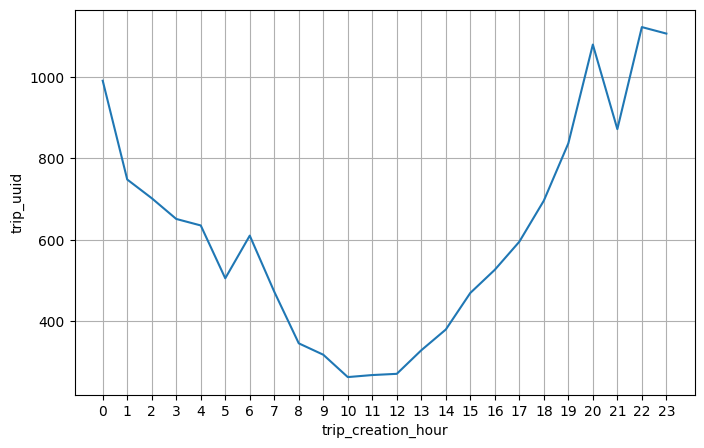

In [ ]:
# trip_creation_hour vs trip_uuid
plt.figure(figsize=(8,5))
sns.lineplot(data = t, x = 'trip_creation_hour', y = 'trip_uuid')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

> we can see that most of the trips are created either in the morning time 4 - 8 AM or late at night 8PM - 1/2AMM. These late night can be wrt to next day trips and early morning's trip creation can be wrt fast/prority delivery that was placed by the customer

In [ ]:
dsf['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3])

In [ ]:
# lets see how may trips are created wrt creation day
t = dsf.reset_index().groupby('trip_creation_day')['trip_uuid'].nunique().reset_index()
t.head()


,trip_creation_day,trip_uuid
0,1,600
1,2,549
2,3,627
3,12,747
4,13,750


[]

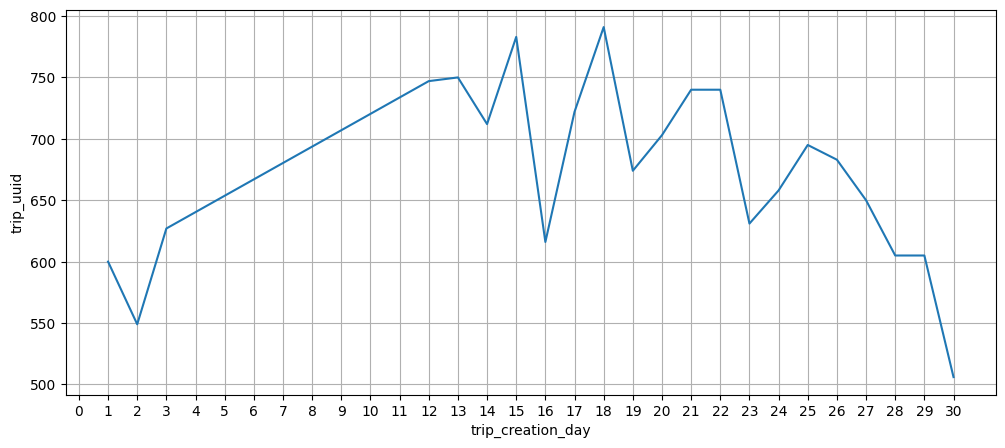

In [ ]:
# trip_creation_day vs trip_uuid
plt.figure(figsize=(12,5))
sns.lineplot(data = t, x = 'trip_creation_day', y = 'trip_uuid')
plt.xticks(np.arange(0,31))
plt.grid('both')
plt.plot()

> we can see most of the activity is in increasing fashion in the first fortnight and seems to descrease after day 20.
> customers place their orders mostly in the middle of the month

In [ ]:
dsf['trip_creation_week'].unique()

array([37, 38, 39, 40])

In [ ]:
# lets see how may trips are created wrt creation week
t = dsf.reset_index().groupby('trip_creation_week')['trip_uuid'].nunique().reset_index()
t.head()

,trip_creation_week,trip_uuid
0,37,3608
1,38,5001
2,39,4402
3,40,1776


[]

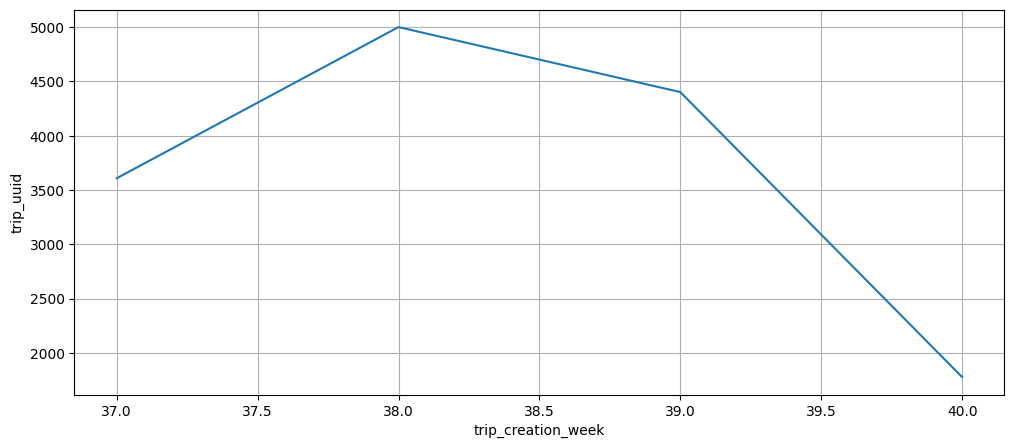

In [ ]:
# trip_creation_week vs trip_uuid
plt.figure(figsize=(12,5))
sns.lineplot(data = t, x = 'trip_creation_week', y = 'trip_uuid')
plt.grid('both')
plt.plot()

> over last few weeks we can see a decrease in the trip creation. The most trips were created in week 38

In [ ]:
# lets see how may trips are created wrt data
t = dsf.reset_index().groupby('data')['trip_uuid'].nunique().reset_index()
t['%total'] = np.round((t['trip_uuid'] / t['trip_uuid'].sum())*100,2)
t.head()

,data,trip_uuid,%total
0,test,4142,28.01
1,training,10645,71.99


In [ ]:
# lets see how may trips are created wrt route_type
t = dsf.reset_index().groupby('route_type')['trip_uuid'].nunique().reset_index()
t['%total'] = np.round((t['trip_uuid'] / t['trip_uuid'].sum())*100,2)
t.head()

,route_type,trip_uuid,%total
0,Carting,8906,60.23
1,FTL,5881,39.77


In [ ]:
# lets see how may trips are created wrt source_states
t = dsf.reset_index().groupby('source_state')['trip_uuid'].nunique().reset_index()
t['%total'] = np.round((t['trip_uuid'] / t['trip_uuid'].sum())*100,2)
t.head()

,source_state,trip_uuid,%total
0,Andhra Pradesh,407,2.75
1,Arunachal Pradesh,4,0.03
2,Assam,273,1.85
3,Bihar,358,2.42
4,Chandigarh,48,0.32


[]

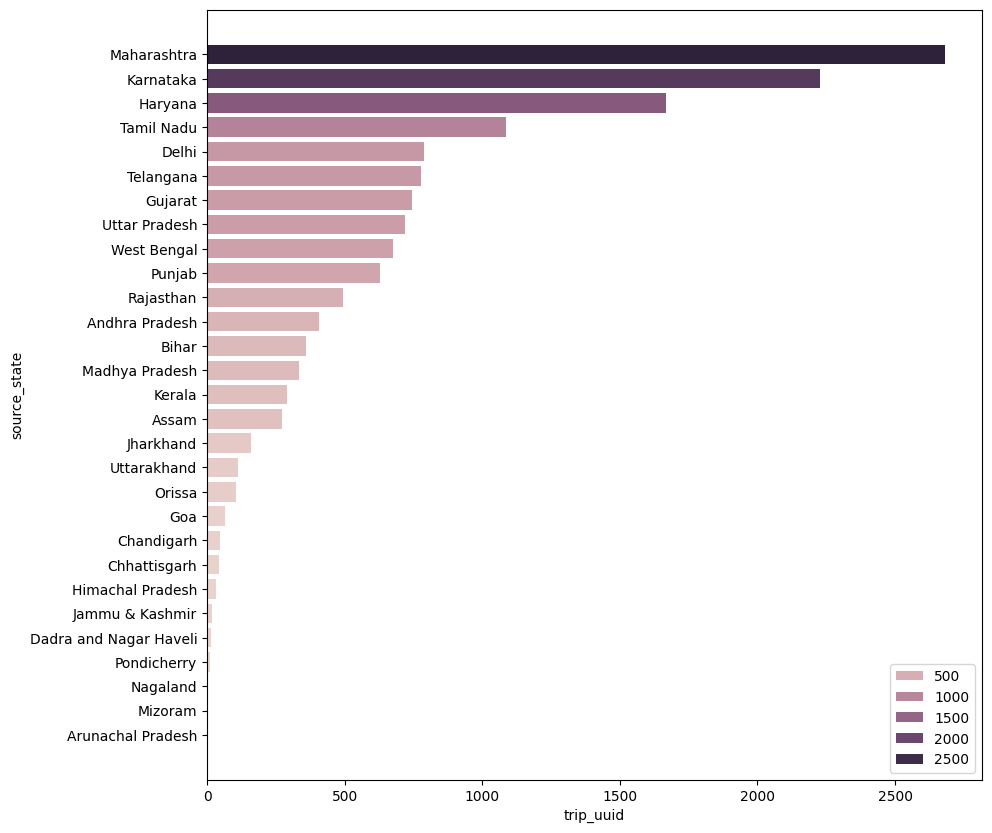

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = t.sort_values('trip_uuid',ascending=False), x = 'trip_uuid', y = 'source_state',hue='trip_uuid')
plt.legend(loc='lower right')
plt.plot()

> we can see most of the trips source is `maharashtra` followed by `karnataka` and `haryana`. This tells use that most of the sellers for most of the product ordered are from these 3 states.

In [ ]:
# lets see how may trips are created wrt source_city taking only top 20 states

t = dsf.reset_index().groupby('source_city')['trip_uuid'].nunique().reset_index()
t['%total'] = np.round((t['trip_uuid'] / t['trip_uuid'].sum())*100,2)
t = t.sort_values('trip_uuid',ascending=False)[:20]
t.head()

,source_city,trip_uuid,%total
79,Bengaluru,1134,7.67
219,Gurgaon,1039,7.03
413,Mumbai,910,6.15
99,Bhiwandi,811,5.48
157,Delhi,805,5.44


[]

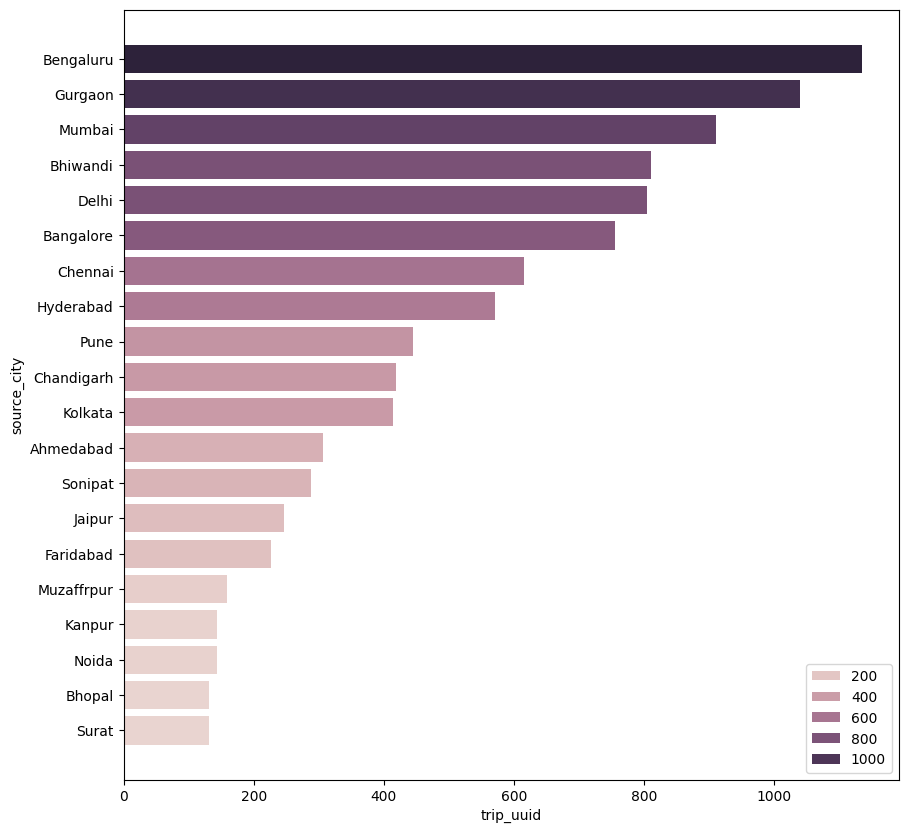

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = t.sort_values('trip_uuid',ascending=False), x = 'trip_uuid', y = 'source_city',hue='trip_uuid')
plt.legend(loc='lower right')
plt.plot()

> we can see most of the trips source is `bengaluru` followed by `gurgaon` and `mumbai`. This tells use that most of the sellers for most of the product ordered are from these 3 cities. Though we saw following order wrt states; maharashtra -> karnataka -> haryana, but at city level we see top is `bengaluru` followed by `gurgaon` and `mumbai`

[]

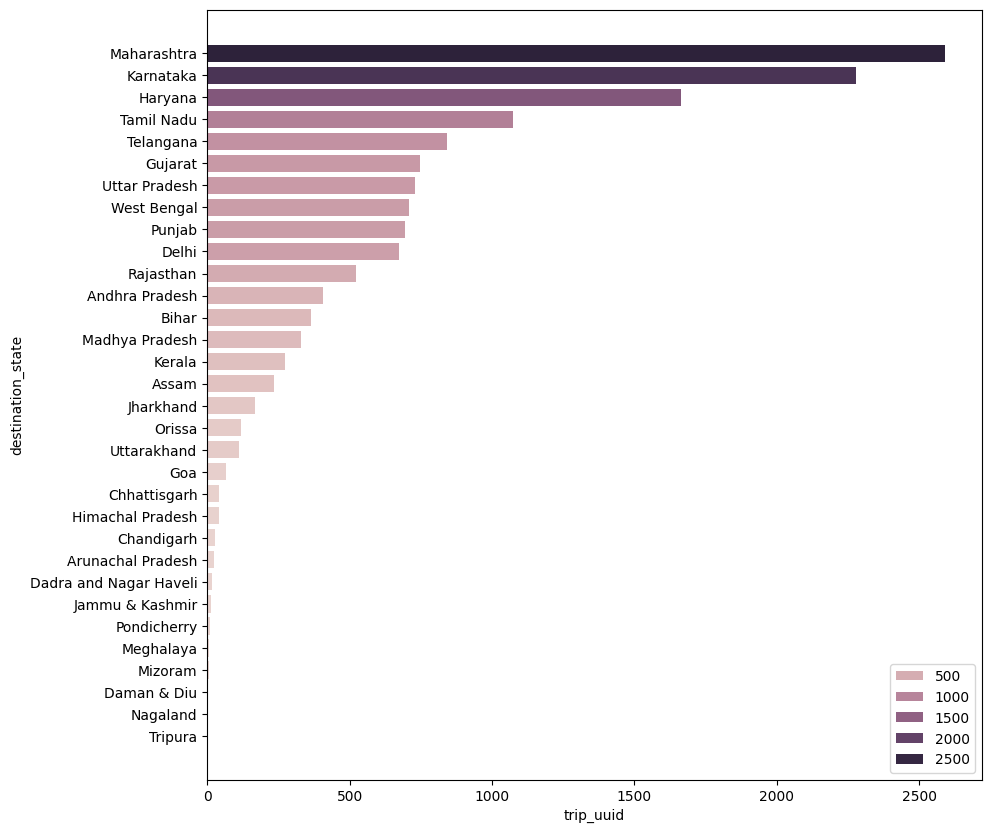

In [ ]:
# lets see similar things but wrt destination
t = dsf.reset_index().groupby('destination_state')['trip_uuid'].nunique().reset_index()
t['%total'] = np.round((t['trip_uuid'] / t['trip_uuid'].sum())*100,2)

plt.figure(figsize = (10, 10))
sns.barplot(data = t.sort_values('trip_uuid',ascending=False), x = 'trip_uuid', y = 'destination_state',hue='trip_uuid')
plt.legend(loc='lower right')
plt.plot()

> similar things can se said for the destination states.
this could either be due to two reasons:
1. more customers from within that states are placing their orders
2. more customers are placing a return order

[]

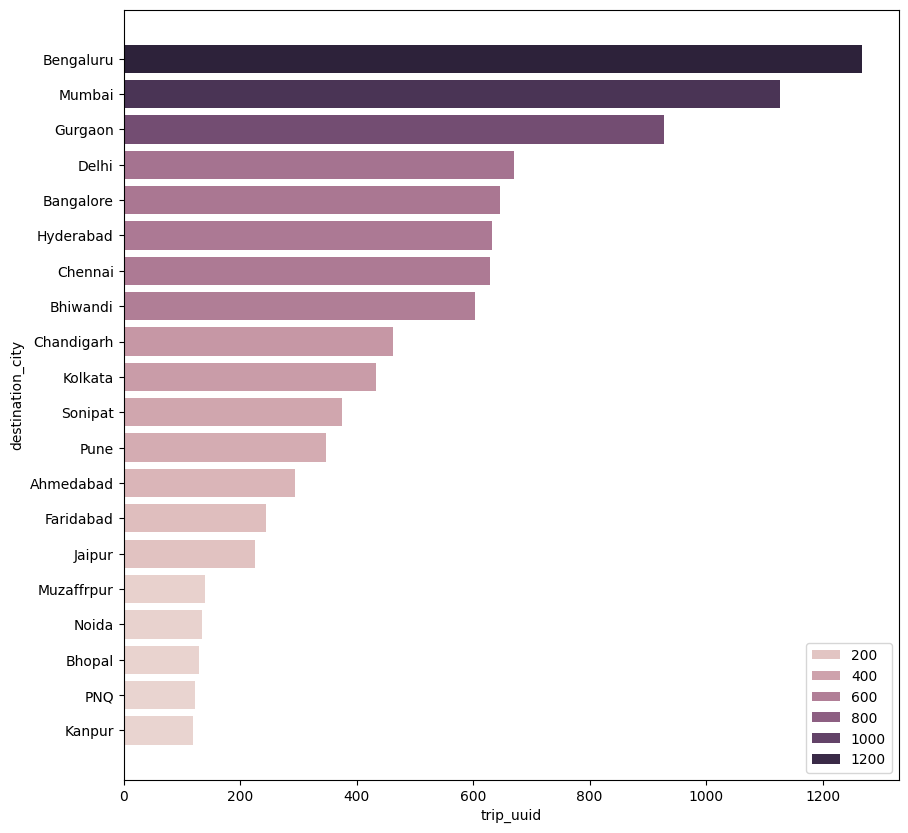

In [ ]:
t = dsf.reset_index().groupby('destination_city')['trip_uuid'].nunique().reset_index()
t['%total'] = np.round((t['trip_uuid'] / t['trip_uuid'].sum())*100,2)
t = t.sort_values('trip_uuid',ascending=False)[:20]
t.head()

plt.figure(figsize = (10, 10))
sns.barplot(data = t.sort_values('trip_uuid',ascending=False), x = 'trip_uuid', y = 'destination_city',hue='trip_uuid')
plt.legend(loc='lower right')
plt.plot()

> similar things can se said for the destination city.
this could either be due to two reasons:
1. more customers from within that city are placing their orders
2. more customers are placing a return order

`NOTE`
  > we can combine results for bengaluru and bangalore for more appropriate representation of the records

In [ ]:
# Outlier Detection & Treatment
num_cols = [x for x in dsf.columns if dsf[x].dtype != 'O']
num_cols

['trip_creation_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'od_time_diff_hour',
 'trip_creation_day',
 'trip_creation_month',
 'trip_creation_year',
 'trip_creation_week',
 'trip_creation_hour']

In [ ]:
[dsf[x].dtypes for x in num_cols]

[dtype('<M8[ns]'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [ ]:
# lets see a heatmap for numerical cols
exclude_column = 'trip_creation_year'
num_cols = [x for x in dsf.columns if x != exclude_column and dsf[x].dtype != 'O']
val = dsf[num_cols].corr()

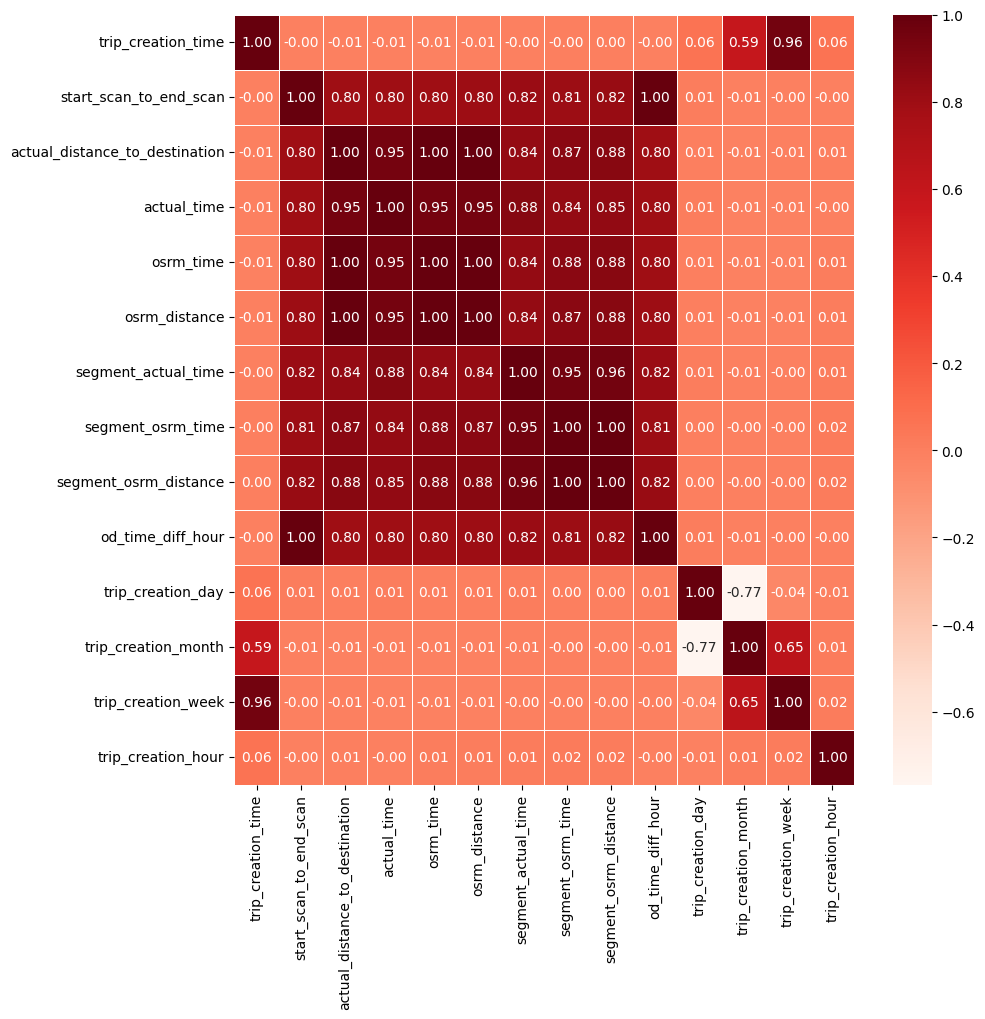

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(val, annot = True ,fmt=".2f", linewidth=.5,cmap="Reds")
plt.show()

##### Outlier Detection & Treatment

In [ ]:
num_cols

['trip_creation_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'od_time_diff_hour',
 'trip_creation_day',
 'trip_creation_month',
 'trip_creation_week',
 'trip_creation_hour']

<Axes: >

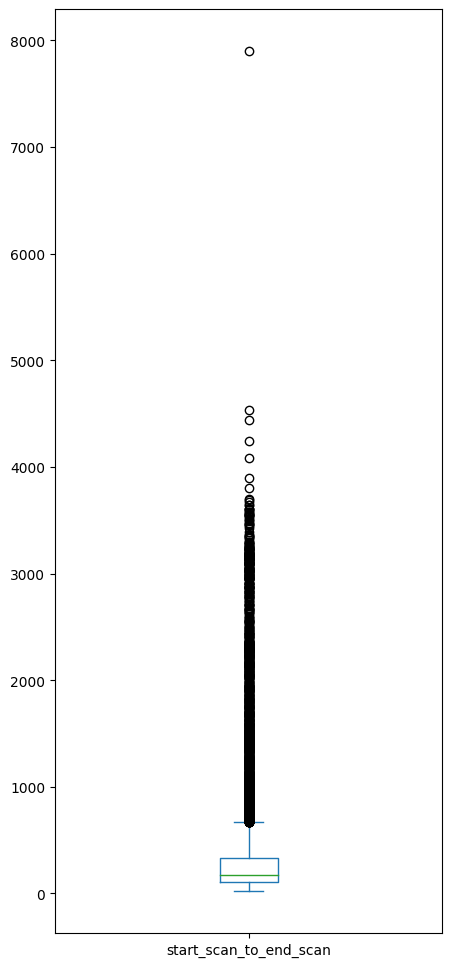

In [ ]:
dsf['start_scan_to_end_scan'].plot.box(figsize=(5,12))

<Axes: >

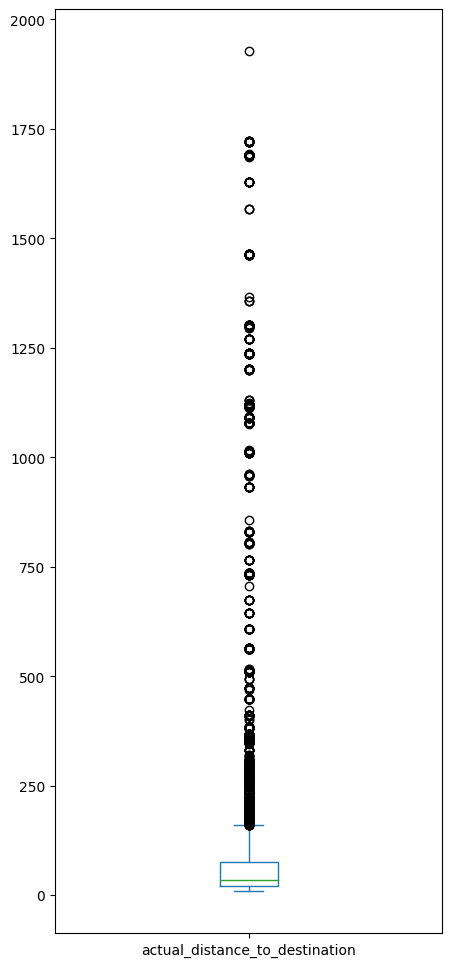

In [ ]:
dsf['actual_distance_to_destination'].plot.box(figsize=(5,12))

<Axes: >

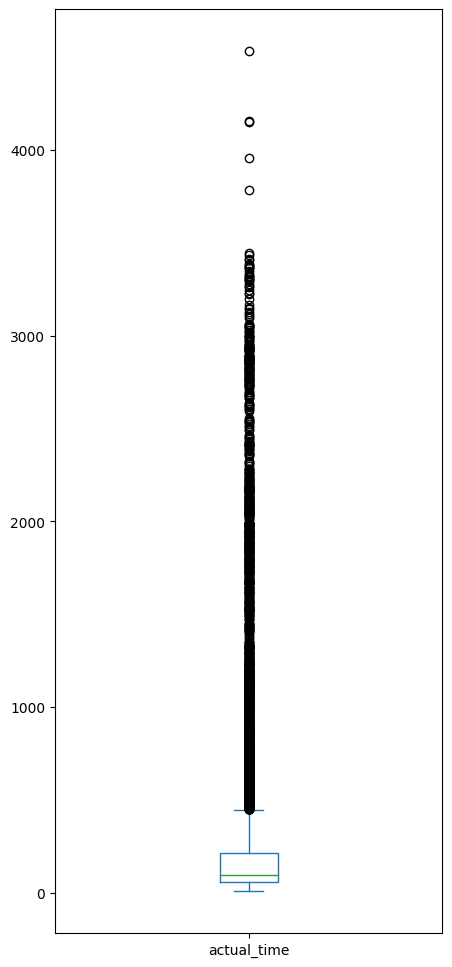

In [ ]:
dsf['actual_time'].plot.box(figsize=(5,12))

In [ ]:
cols =['trip_creation_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'od_time_diff_hour',
 'trip_creation_day',
 'trip_creation_month',
 'trip_creation_week',
 'trip_creation_hour']

In [ ]:
# Detecting Outliers

for i in cols:
    Q1 = np.quantile(dsf[i], 0.25)
    Q3 = np.quantile(dsf[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = dsf.loc[(dsf[i] < LB) | (dsf[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : trip_creation_time
Q1 : 2018-09-17T02:38:18.128432000
Q3 : 2018-09-27T19:23:14.074359500
IQR : 924295945927500 nanoseconds
LB : 2018-09-01T01:30:54.209540750
UB : 2018-10-13T20:30:37.993250750
Number of outliers : 0
----------------------------------
Column : start_scan_to_end_scan
Q1 : 108.0
Q3 : 333.0
IQR : 225.0
LB : -229.5
UB : 670.5
Number of outliers : 1522
----------------------------------
Column : actual_distance_to_destination
Q1 : 20.373702358336672
Q3 : 75.9869569449547
IQR : 55.61325458661803
LB : -63.04617952159036
UB : 159.40683882488173
Number of outliers : 1999
----------------------------------
Column : actual_time
Q1 : 56.0
Q3 : 213.0
IQR : 157.0
LB : -179.5
UB : 448.5
Number of outliers : 1831
----------------------------------
Column : osrm_time
Q1 : 24.0
Q3 : 82.0
IQR : 58.0
LB : -63.0
UB : 169.0
Number of outliers : 1830
----------------------------------
Column : osrm_distance
Q1 : 26.87175
Q3 : 98.20124999999999
IQR : 71.3295
LB : -80.1225
UB : 205.195

In [ ]:
def remove_outliers(df, numerical_cols):
    df_cleaned = df.copy()
    for col in numerical_cols:
        if pd.api.types.is_numeric_dtype(df[col]):

            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

In [ ]:
test = remove_outliers(dsf, cols)

In [ ]:
test.shape

(10491, 29)

In [ ]:
test.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_date,trip_creation_week,trip_creation_hour
trip_uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),122.0,24.644021,47.0,26.0,28.1994,141.0,65.0,84.1894,2.05,Tumkur,Veersagr_I,I,Karnataka,Chikblapur,ShntiSgr_D,D,Karnataka,12,9,2018,2018-09-12,37,0
trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,1.67,Mumbai,No Place Record,No Code Record,Maharashtra,Mumbai,MiraRd_IP,IP,Maharashtra,12,9,2018,2018-09-12,37,0
trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),152.0,41.317614,131.0,44.0,53.5761,340.0,115.0,146.7919,2.53,Bellary,Dc,No Code Record,Karnataka,Bellary,Dc,No Code Record,Karnataka,12,9,2018,2018-09-12,37,0
trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,Chennai_Porur_DPC (Tamil Nadu),Chennai_Sriperumbudur_Dc (Tamil Nadu),129.0,15.325529,40.0,12.0,16.2225,60.0,23.0,28.0647,2.16,Chennai,Porur_DPC,DPC,Tamil Nadu,Chennai,Sriperumbudur_Dc,Dc,Tamil Nadu,12,9,2018,2018-09-12,37,0
trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,1.63,Chennai,Chrompet_DPC,DPC,Tamil Nadu,Chennai,Vandalur_Dc,Dc,Tamil Nadu,12,9,2018,2018-09-12,37,0


In [ ]:
dsf2 = test.copy()

#### Hypothesis Testing:

- STEP-1 : Set up Null Hypothesis
- STEP-2 : Checking for basic assumpitons for the hypothesis
- STEP-3: Define Test statistics; Distribution of T under H0.
- STEP-4: Compute the p-value and fix value of alpha.
- STEP-5: Compare p-value and alpha.

In [ ]:
# compare : actual_time aggregated value and OSRM time aggregated value
dsf[['actual_time' , 'osrm_time']].describe()

,actual_time,osrm_time
count,14787.000000,14787.000000
mean,251.134375,108.303645
std,455.202399,218.447496
min,9.000000,6.000000
25%,56.000000,24.000000
50%,98.000000,41.000000
75%,213.000000,82.000000
max,4532.000000,1686.000000


[]

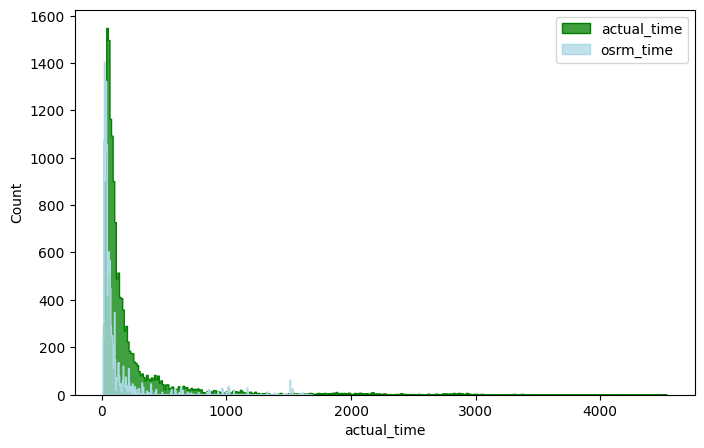

In [ ]:
# checking visually if they follow normal dist
plt.figure(figsize = (8, 5))
sns.histplot(dsf['actual_time'], element = 'step', color = 'green')
sns.histplot(dsf['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

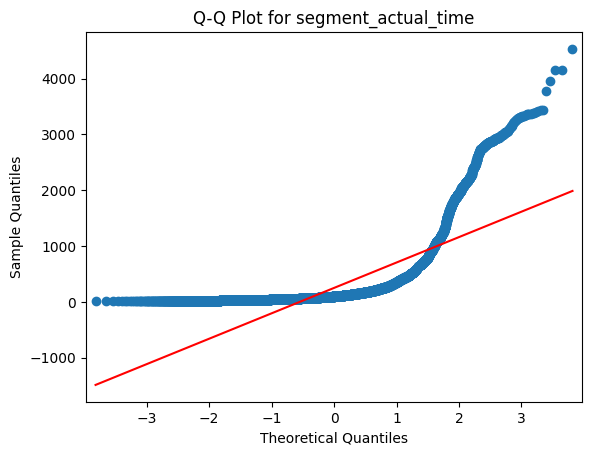

In [ ]:
# checking using qq plot
qqplot(dsf['actual_time'], line='s')
plt.title('Q-Q Plot for segment_actual_time')
plt.show()

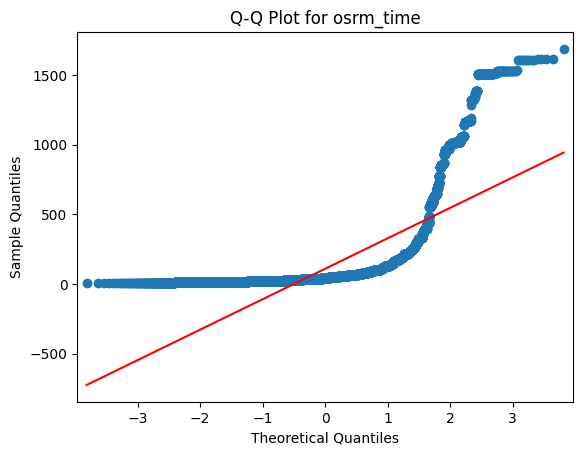

In [ ]:
qqplot(dsf['osrm_time'], line='s')
plt.title('Q-Q Plot for osrm_time')
plt.show()

> we can see from the QQ plots that these doesnot follow normal distribution

In [ ]:
# Applying Shapiro-Wilk test for normality

#  h0 : The sample follows normal distribution
#  ha : The sample does not follow normal distribution
test_stat, p_value = shapiro(dsf['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

pp.printll()


test_stat, p_value = shapiro(dsf['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

p-value 0.0
reject the H0
--------------------------------------------------------------------------------
p-value 0.0
reject the H0


> the samples doesnot follow normal distribution

In [ ]:
# Applying Lavene's test test for Homogeneity

# h0 : Homogenous Variance
# ha : Non Homogenous Variance

test_stat, p_value = levene(dsf['actual_time'], dsf['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

p-value 4.417722834578231e-165
reject the H0


> the samples doesnot follow Homogeneity

In [ ]:
# Since the samples do not follow any of the assumptions of T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.
test_stat, p_value = stats.mannwhitneyu(dsf['actual_time'], dsf['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar


> we can conclude `actual_time` and `osrm_time` are not similar

In [ ]:
# compare : actual_time aggregated value and segment actual time aggregated value
dsf[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14787.000000,14787.000000
mean,251.134375,353.059174
std,455.202399,556.365911
min,9.000000,9.000000
25%,56.000000,66.000000
50%,98.000000,147.000000
75%,213.000000,364.000000
max,4532.000000,6230.000000


[]

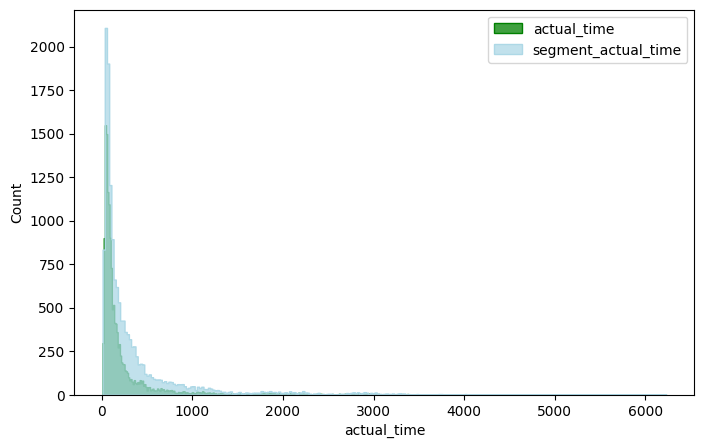

In [ ]:
# checking visually if they follow normal dist
plt.figure(figsize = (8, 5))
sns.histplot(dsf['actual_time'], element = 'step', color = 'green')
sns.histplot(dsf['segment_actual_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

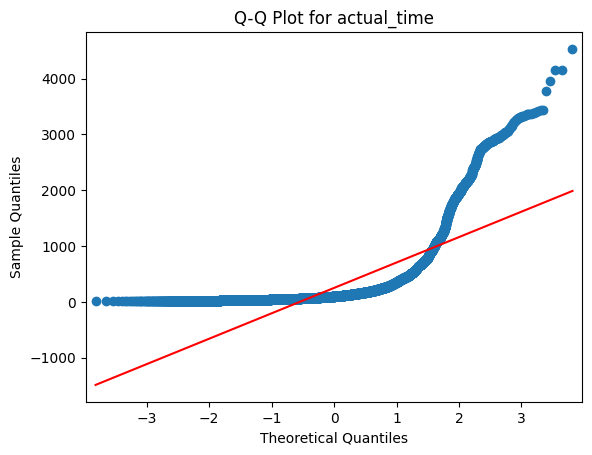

In [ ]:
# checking using qq plot
qqplot(dsf['actual_time'], line='s')
plt.title('Q-Q Plot for actual_time')
plt.show()

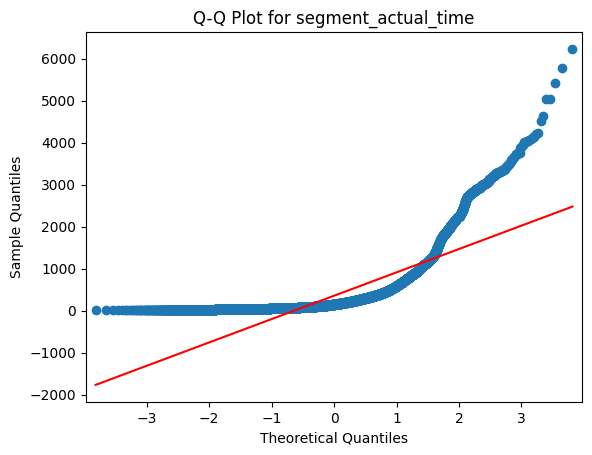

In [ ]:
qqplot(dsf['segment_actual_time'], line='s')
plt.title('Q-Q Plot for segment_actual_time')
plt.show()

> we can see from the QQ plots that these doesnot follow normal distribution

In [ ]:
# Applying Shapiro-Wilk test for normality

#  h0 : The sample follows normal distribution
#  ha : The sample does not follow normal distribution
test_stat, p_value = shapiro(dsf['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

pp.printll()


test_stat, p_value = shapiro(dsf['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

p-value 0.0
reject the H0
--------------------------------------------------------------------------------
p-value 0.0
reject the H0


In [ ]:
# Applying Lavene's test test for Homogeneity

# h0 : Homogenous Variance
# ha : Non Homogenous Variance

test_stat, p_value = levene(dsf['actual_time'], dsf['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

p-value 1.1969205169904284e-54
reject the H0


> the samples doesnot follow Homogeneity

In [ ]:
# Since the samples do not follow any of the assumptions of T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.
test_stat, p_value = stats.mannwhitneyu(dsf['actual_time'], dsf['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.368708789733147e-133
The samples are not similar


> we can conclude that `actual_time` and `segment_actual_time` are not same

In [ ]:
# compare : osrm_distance aggregated value and segment_osrm_distance aggregated value
dsf[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14787.000000,14787.000000
mean,138.288962,222.705466
std,300.259409,416.846279
min,9.072900,9.072900
25%,26.871750,32.578850
50%,43.905100,69.784200
75%,98.201250,216.560600
max,2326.199100,3523.632400


[]

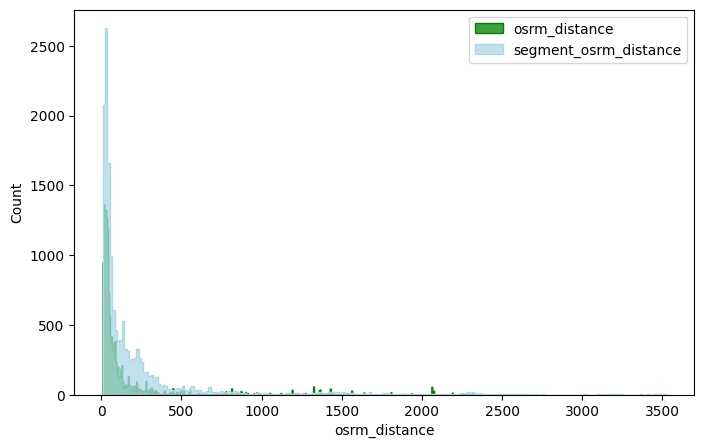

In [ ]:
# checking visually if they follow normal dist
plt.figure(figsize = (8, 5))
sns.histplot(dsf['osrm_distance'], element = 'step', color = 'green')
sns.histplot(dsf['segment_osrm_distance'], element = 'step', color = 'lightblue')
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

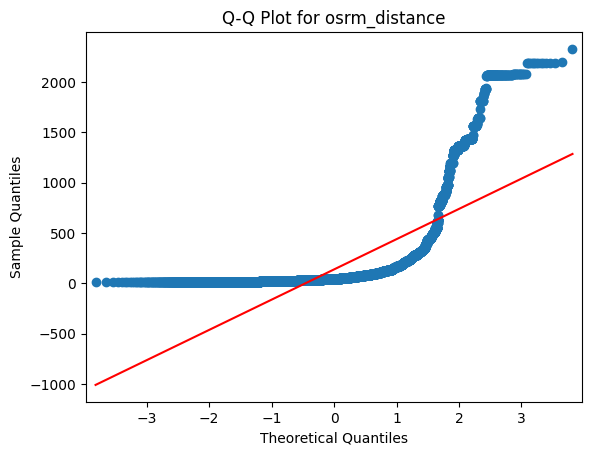

In [ ]:
# checking using qq plot
qqplot(dsf['osrm_distance'], line='s')
plt.title('Q-Q Plot for osrm_distance')
plt.show()

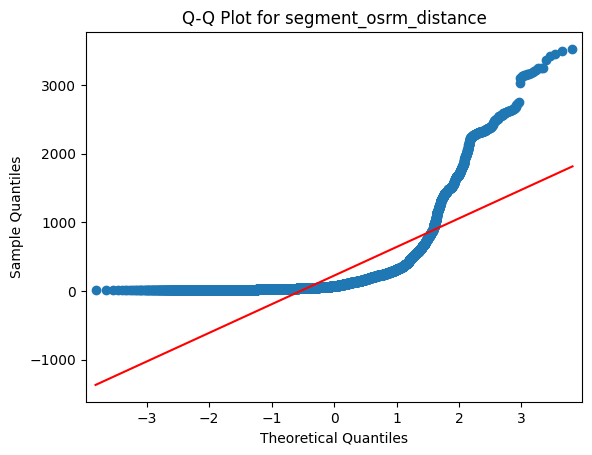

In [ ]:
qqplot(dsf['segment_osrm_distance'], line='s')
plt.title('Q-Q Plot for segment_osrm_distance')
plt.show()

In [ ]:
# Applying Shapiro-Wilk test for normality

#  h0 : The sample follows normal distribution
#  ha : The sample does not follow normal distribution
test_stat, p_value = shapiro(dsf['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

pp.printll()


test_stat, p_value = shapiro(dsf['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

p-value 0.0
reject the H0
--------------------------------------------------------------------------------
p-value 0.0
reject the H0


> both samples are not normally distributed

In [ ]:
# Applying Lavene's test test for Homogeneity

# h0 : Homogeneous Variance
# ha : Non Homogeneous Variance

test_stat, p_value = levene(dsf['osrm_distance'], dsf['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('reject the H0')
else:
    print('failed to reject H0')

p-value 1.879699723806504e-77
reject the H0


> both samples are not homogeneous

In [ ]:
# Since the samples do not follow any of the assumptions of T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.
test_stat, p_value = stats.mannwhitneyu(dsf['osrm_distance'], dsf['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.243212272526995e-200
The samples are not similar


> we can conclude `osrm_distance` and `segment_osrm_distance` are not similar

In [ ]:
dsf2.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_date,trip_creation_week,trip_creation_hour
trip_uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),122.0,24.644021,47.0,26.0,28.1994,141.0,65.0,84.1894,2.05,Tumkur,Veersagr_I,I,Karnataka,Chikblapur,ShntiSgr_D,D,Karnataka,12,9,2018,2018-09-12,37,0
trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,1.67,Mumbai,No Place Record,No Code Record,Maharashtra,Mumbai,MiraRd_IP,IP,Maharashtra,12,9,2018,2018-09-12,37,0
trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),152.0,41.317614,131.0,44.0,53.5761,340.0,115.0,146.7919,2.53,Bellary,Dc,No Code Record,Karnataka,Bellary,Dc,No Code Record,Karnataka,12,9,2018,2018-09-12,37,0
trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,Chennai_Porur_DPC (Tamil Nadu),Chennai_Sriperumbudur_Dc (Tamil Nadu),129.0,15.325529,40.0,12.0,16.2225,60.0,23.0,28.0647,2.16,Chennai,Porur_DPC,DPC,Tamil Nadu,Chennai,Sriperumbudur_Dc,Dc,Tamil Nadu,12,9,2018,2018-09-12,37,0
trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,1.63,Chennai,Chrompet_DPC,DPC,Tamil Nadu,Chennai,Vandalur_Dc,Dc,Tamil Nadu,12,9,2018,2018-09-12,37,0


#### one-hot encoding of categorical variables

In [ ]:
# categorical variable : route_type
dsf2['route_type'].value_counts()

route_type
Carting    7582
FTL        2909
Name: count, dtype: int64

In [ ]:
le = LabelEncoder()
dsf2['route_type'] = le.fit_transform(dsf2['route_type'])
# country_mapping = {index : label for index , label in enumerate(le.classes_)}

In [ ]:
dsf2['route_type'].value_counts()

route_type
0    7582
1    2909
Name: count, dtype: int64

In [ ]:
# categorical variable : data

dsf2['data'].value_counts()

data
1    8522
0    1969
Name: count, dtype: int64

In [ ]:
le = LabelEncoder()
dsf2['data'] = le.fit_transform(dsf2['data'])
# country_mapping = {index : label for index , label in enumerate(le.classes_)}
dsf2['data'].value_counts()

data
1    8522
0    1969
Name: count, dtype: int64

In [ ]:
# categorical variable : source_state
le = LabelEncoder()
dsf2['source_state'] = le.fit_transform(dsf2['source_state'])
source_state_mapping = {index : label for index , label in enumerate(le.classes_)}

In [ ]:
source_state_mapping

{0: 'Andhra Pradesh',
 1: 'Arunachal Pradesh',
 2: 'Assam',
 3: 'Bihar',
 4: 'Chandigarh',
 5: 'Chhattisgarh',
 6: 'Dadra and Nagar Haveli',
 7: 'Delhi',
 8: 'Goa',
 9: 'Gujarat',
 10: 'Haryana',
 11: 'Himachal Pradesh',
 12: 'Jammu & Kashmir',
 13: 'Jharkhand',
 14: 'Karnataka',
 15: 'Kerala',
 16: 'Madhya Pradesh',
 17: 'Maharashtra',
 18: 'Nagaland',
 19: 'Orissa',
 20: 'Pondicherry',
 21: 'Punjab',
 22: 'Rajasthan',
 23: 'Tamil Nadu',
 24: 'Telangana',
 25: 'Uttar Pradesh',
 26: 'Uttarakhand',
 27: 'West Bengal'}

In [ ]:
# categorical variable : destination_state
le = LabelEncoder()
dsf2['destination_state'] = le.fit_transform(dsf2['destination_state'])
destination_state_mapping = {index : label for index , label in enumerate(le.classes_)}

In [ ]:
destination_state_mapping

{0: 'Andhra Pradesh',
 1: 'Arunachal Pradesh',
 2: 'Assam',
 3: 'Bihar',
 4: 'Chandigarh',
 5: 'Chhattisgarh',
 6: 'Dadra and Nagar Haveli',
 7: 'Delhi',
 8: 'Goa',
 9: 'Gujarat',
 10: 'Haryana',
 11: 'Himachal Pradesh',
 12: 'Jammu & Kashmir',
 13: 'Jharkhand',
 14: 'Karnataka',
 15: 'Kerala',
 16: 'Madhya Pradesh',
 17: 'Maharashtra',
 18: 'Meghalaya',
 19: 'Mizoram',
 20: 'Nagaland',
 21: 'Orissa',
 22: 'Pondicherry',
 23: 'Punjab',
 24: 'Rajasthan',
 25: 'Tamil Nadu',
 26: 'Telangana',
 27: 'Tripura',
 28: 'Uttar Pradesh',
 29: 'Uttarakhand',
 30: 'West Bengal'}

#### Normalize/Standardize the numerical features

In [ ]:
dsf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10491 entries, trip-153671042288605164 to trip-153835198515486693
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            10491 non-null  int64         
 1   trip_creation_time              10491 non-null  datetime64[ns]
 2   route_schedule_uuid             10491 non-null  object        
 3   route_type                      10491 non-null  int64         
 4   source_name                     10491 non-null  object        
 5   destination_name                10491 non-null  object        
 6   start_scan_to_end_scan          10491 non-null  float64       
 7   actual_distance_to_destination  10491 non-null  float64       
 8   actual_time                     10491 non-null  float64       
 9   osrm_time                       10491 non-null  float64       
 10  osrm_distance                   104

In [ ]:
x = [
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'od_time_diff_hour',
 'trip_creation_day',
 'trip_creation_month',
 'trip_creation_week',
 'trip_creation_hour']

ss = StandardScaler()
std_data = pd.DataFrame(ss.fit_transform(dsf2[x]) , columns = dsf2[x].columns)
std_data.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,trip_creation_day,trip_creation_month,trip_creation_week,trip_creation_hour
0,-0.541247,-0.484249,-0.757292,-0.604947,-0.587322,-0.137173,-0.197856,-0.060097,-0.537120,-1.595731,0.0,-1.358922,-1.542396
1,-0.724700,-0.744111,-0.600376,-0.981840,-0.821241,-0.720599,-0.855496,-0.801609,-0.727248,-1.595731,0.0,-1.358922,-1.542396
2,-0.291084,0.095879,0.341120,0.011787,0.109451,1.278702,0.473204,0.661696,-0.296957,-1.595731,0.0,-1.358922,-1.542396
3,-0.482875,-0.808470,-0.848826,-1.084629,-0.916174,-0.713484,-0.761547,-0.707202,-0.482082,-1.595731,0.0,-1.358922,-1.542396
4,-0.741377,-1.025058,-1.058047,-1.050366,-1.031607,-0.969622,-0.895759,-0.892212,-0.747262,-1.595731,0.0,-1.358922,-1.542396


In [ ]:
mm = MinMaxScaler()
minmax_data = pd.DataFrame(mm.fit_transform(dsf2[x]) , columns = dsf2[x].columns)
minmax_data.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,trip_creation_day,trip_creation_month,trip_creation_week,trip_creation_hour
0,0.154560,0.104799,0.086758,0.117284,0.099576,0.165207,0.143564,0.155641,0.154917,0.0,0.0,0.0,0.0
1,0.120556,0.054758,0.114155,0.049383,0.055223,0.062578,0.022277,0.022385,0.119666,0.0,0.0,0.0,0.0
2,0.200927,0.216512,0.278539,0.228395,0.231693,0.414268,0.267327,0.285353,0.199443,0.0,0.0,0.0,0.0
3,0.165379,0.042365,0.070776,0.030864,0.037222,0.063830,0.039604,0.039351,0.165121,0.0,0.0,0.0,0.0
4,0.117465,0.000657,0.034247,0.037037,0.015335,0.018773,0.014851,0.006103,0.115955,0.0,0.0,0.0,0.0


### Recommendations

1. **Optimize OSRM Trip Planning System**:
   - Enhance the OSRM trip planning system to address discrepancies for transporters, ensuring optimal routing configurations.

2. **Improve Delivery Time Prediction**:
   - Reduce differences between osrm_time and actual_time to enhance delivery time prediction accuracy and provide customers with more reliable delivery estimates.

3. **Ensure Consistency in Distance Calculation**:
   - Investigate and resolve discrepancies between osrm distance and osrm segment distance covered to address potential causes such as route deviations or inaccuracies in route prediction.

4. **Enhance Service in Key States**:
   - Focus on improving service penetration in high-demand states like Maharashtra, Karnataka, Haryana, by optimizing existing corridors and expanding coverage.

5. **Customer Profiling for Key States**:
   - Conduct customer profiling for states with high order volumes (Maharashtra, Karnataka, Haryana, and Tamil Nadu) to understand buying patterns and enhance overall customer experience.

6. **Strategic Planning Based on State Conditions**:
   - Utilize insights into traffic congestion and terrain conditions in different states to strategize and meet demand effectively, especially during peak festival seasons.